In [ ]:
!wget http://download.tensorflow.org/example_images/flower_photos.tgz

--2020-10-01 05:29:40--  http://download.tensorflow.org/example_images/flower_photos.tgz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   177MB/s    in 1.2s    

2020-10-01 05:29:42 (177 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
!tar zxvf flower_photos.tgz

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
from glob import glob
import cv2
import numpy as np

In [ ]:
labels=['daisy','dandelion','roses','sunflowers','tulips']
path=[]

for location in labels:
     path.extend(glob('flower_photos/'+location+'/*.jpg'))

In [ ]:
len(path)

3670

In [ ]:
X=[]
Y=[]
labels=['daisy','dandelion','roses','sunflowers','tulips']
for i in path:
        data=cv2.imread(i)
        data=cv2.resize(data, (64, 64))
        X.append(data)
        for j,label in enumerate(labels):
                  if label in i:
                      Y.append(j)
                      break  

In [ ]:
X=np.array(X)
Y=np.array(Y)       

In [ ]:
np.shape(Y)

(3670,)

In [ ]:
np.shape(X)


(3670, 64, 64, 3)

In [ ]:
np.unique(Y)

array([0, 1, 2, 3, 4])

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
np.shape(X_train)

(2936, 64, 64, 3)

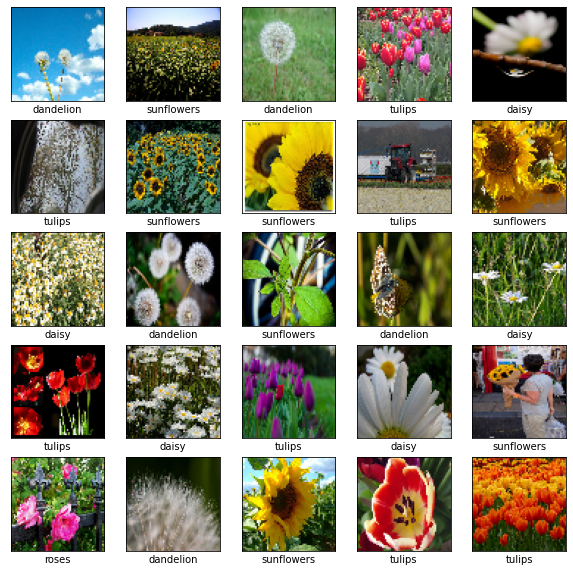

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i][...,::-1], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(labels[y_train[i]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50,  
                    validation_data=(X_test,y_test))

Epoch 1/50
92/92 [==============================] - 1s 8ms/step - loss: 1.5181 - accuracy: 0.3546 - val_loss: 1.4643 - val_accuracy: 0.4183
Epoch 2/50
92/92 [==============================] - 0s 5ms/step - loss: 1.4110 - accuracy: 0.4792 - val_loss: 1.3769 - val_accuracy: 0.5191
Epoch 3/50
92/92 [==============================] - 0s 5ms/step - loss: 1.3608 - accuracy: 0.5416 - val_loss: 1.3545 - val_accuracy: 0.5436
Epoch 4/50
92/92 [==============================] - 0s 4ms/step - loss: 1.3339 - accuracy: 0.5651 - val_loss: 1.3611 - val_accuracy: 0.5409
Epoch 5/50
92/92 [==============================] - 1s 6ms/step - loss: 1.3182 - accuracy: 0.5800 - val_loss: 1.3098 - val_accuracy: 0.5954
Epoch 6/50
92/92 [==============================] - 0s 5ms/step - loss: 1.2907 - accuracy: 0.6141 - val_loss: 1.3402 - val_accuracy: 0.5599
Epoch 7/50
92/92 [==============================] - 0s 4ms/step - loss: 1.2899 - accuracy: 0.6107 - val_loss: 1.3248 - val_accuracy: 0.5668
Epoch 8/50
92/92 [==

23/23 - 0s - loss: 1.2534 - accuracy: 0.6471


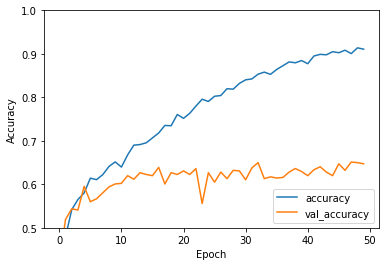

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

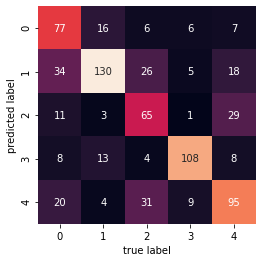

In [ ]:
import seaborn as sns

y_predict=model.predict(X_test)
a=np.argmax(y_predict,axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, a)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
model.save('model_flower.h5')

In [ ]:
ls

flower_photos/  flower_photos.tgz  model_flower.h5  sample_data/


In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('model_flower.h5')

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
!wget -O "1.jpg" https://www.gilmour.com/wp-content/uploads/2018/03/growing-sunflowers.jpg

--2020-10-01 05:30:34--  https://www.gilmour.com/wp-content/uploads/2018/03/growing-sunflowers.jpg
Resolving www.gilmour.com (www.gilmour.com)... 23.185.0.3, 2620:12a:8001::3, 2620:12a:8000::3
Connecting to www.gilmour.com (www.gilmour.com)|23.185.0.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139359 (136K) [image/jpeg]
Saving to: ‘1.jpg’

1.jpg               100%[===================>] 136.09K  --.-KB/s    in 0.02s   

2020-10-01 05:30:34 (5.64 MB/s) - ‘1.jpg’ saved [139359/139359]



In [ ]:
img=cv2.imread('1.jpg')

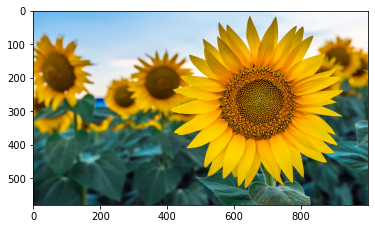

In [ ]:
plt.imshow(img[...,::-1])

In [ ]:
img=cv2.resize(img,(64,64))
b=np.reshape(img,(-1,64,64,3))

In [ ]:
y_predict=model.predict(b)

In [ ]:
y_predict

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
labels[np.argmax(y_predict,axis=1)[0]]

'sunflowers'

In [ ]:
y_predict[0][np.argmax(y_predict,axis=1)[0]]

1.0